<a href="https://colab.research.google.com/github/jinsu1214/class2022spring/blob/main/tensorflow%20and%20pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow & pytorch 
똑같음 tensorflow는 구글 pytorch는 facebook에서 만들었따.둘 다 python으로 쓰여져 있는 ai패키지이다. huggingface에 있는 aimodel들은 둘 중에 하나로 쓰여져 있다. tensorflow hub랑 pytorch hub가 따로 있기도 하다.

Tensorflow Hub  
입력 벡터가 있고 ai행렬이 하나 혹은 여러개 있고 출력 벡터가 있는 것이 보편적이다. 입출력에 있는 데이처가 만약 입력이 강아지 사진이고 출력이 강아지인 것을 확인해 주고 혹은 꼿 사진을 꽃이라고 말해주는 데이터가 여러개 있을 때 입력에 어느 사진이 들어와도 맞출 수 있도록  ai가 훈련이 된다. 근데 fine tuning이 있다. pretrained model이 있다는 것을 가정해야한다. 원래는 코끼리가 oretrained되지 않아서 데이터에 없기 떄문에 입력에 넣지 못했다면 fine tuning에서는  이를 확장시켰다고 이해하면 된다. tensorflow hub는 pretrained model을 가지고 있는데 좀 더 변형을 해서 fine tuning도 되고 바로 쓰는 deploy 또한 가능하다.

image classification  
Keraslyer 뒤에 사이트 이름이 적혀져 있는데 이는  inception_v3 에서 가져온 것이다.

In [1]:
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub

In [2]:
model = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v3/classification/5")

In [3]:
from PIL import Image
import requests
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

이미지는 url에서 받아오고 받아온 image는 model에 넣어줘야 한다. 이떄 image를 바로 쓸 수 있는게 아니라 numpy형태야 하기 때문에 array해줘야 하고 또 이것도 바로 쓰는 것이 아니라 reshape하다. 원래 3차원의 array인데 이 모델 자체가 4차원을 받기 때문에 4차원 array로 바꿔주는 reshape이 필요하다. 그리고 모델 자체는 0에서 1사이 숫자로 만들라고 해서 한번 더 convert하는 과정이 필요하다.

In [4]:
import numpy as np
image = np.array(image)
# reshape into shape [batch_size, height, width, num_channels]
image = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
# Use `convert_image_dtype` to convert to floats in the [0,1] range.
image = tf.image.convert_image_dtype(image, tf.float32)

In [5]:
logits = model(image)
np.argmax(logits)

282

1000개 중에 어떤 것이 가장 높은 값인지 알려주는 것이 argmax이다. 실행하면 282이다. 모델에서 사용한 label 1000개 중에서 282가 가장 높다는 것. 엑셀로 되어있는데 0부터 시작한다는 것을 유의하기.  
https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt  


Pytorch Hub  
세상에 존재하지 않는 유명인 얼굴을 계속해서 새롭게 만드는 모델을 배워볼 것이다.  
PGAN 모델 가져온 사이트 주소이다.

In [ ]:
import torch
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'PGAN', model_name='celebAHQ-512', pretrained=True)

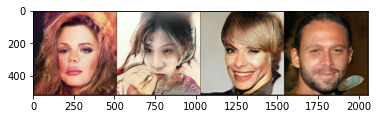

In [8]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())

model.tst해서 noise를 넣어주면 유명인 얼굴이 만들어준다. 왜 랜덤한 숫자인 noisse를 넣어줄까? 그렇게 설정이 되어있다.